In [9]:
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


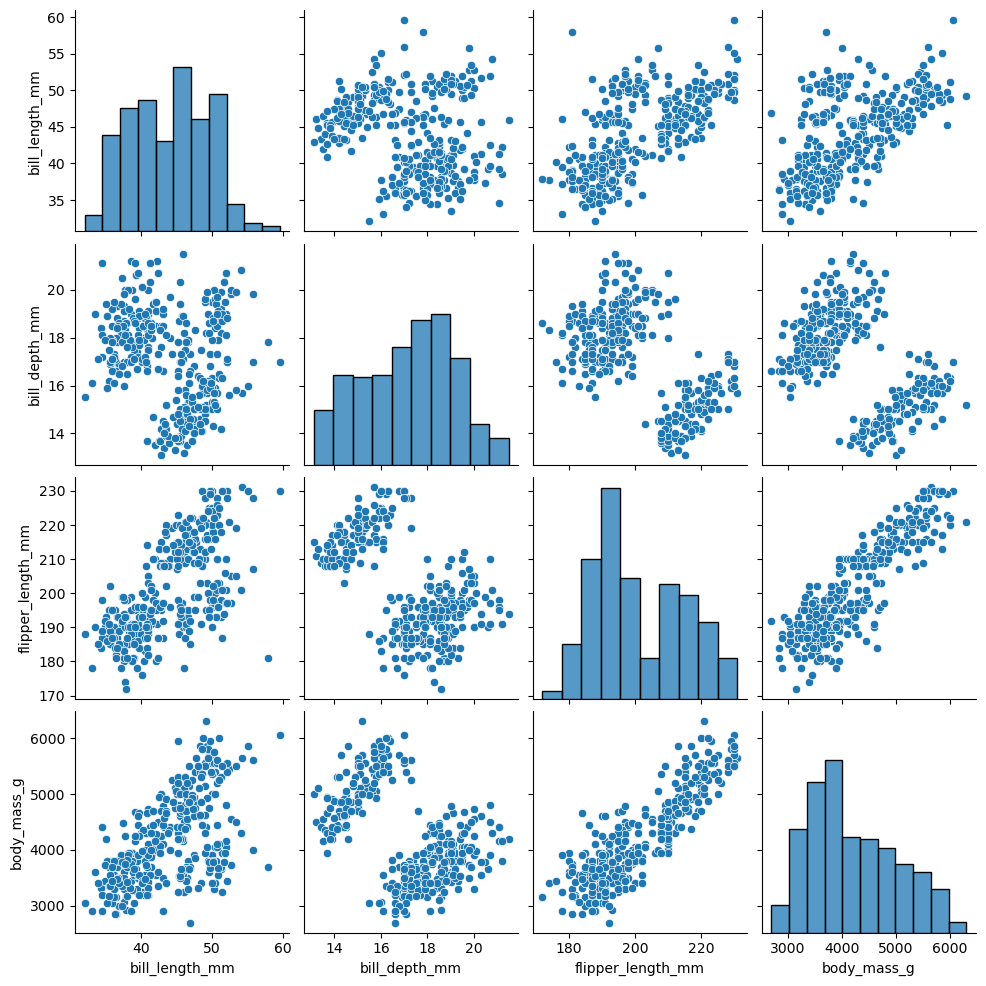

In [4]:
sns.pairplot(penguins)

From the pairplot it seems that there are 2 or 3 clusters

In [151]:
features = ['bill_length_mm']
km = KMeans(n_clusters=2, random_state=43).fit(penguins[features])
penguins['cluster'] = km.predict(penguins[features])

In [152]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [153]:
penguins.cluster.value_counts()

0    171
1    162
Name: cluster, dtype: int64

In [154]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6440353676082992

n_clusters = 2 had the result closest to 1

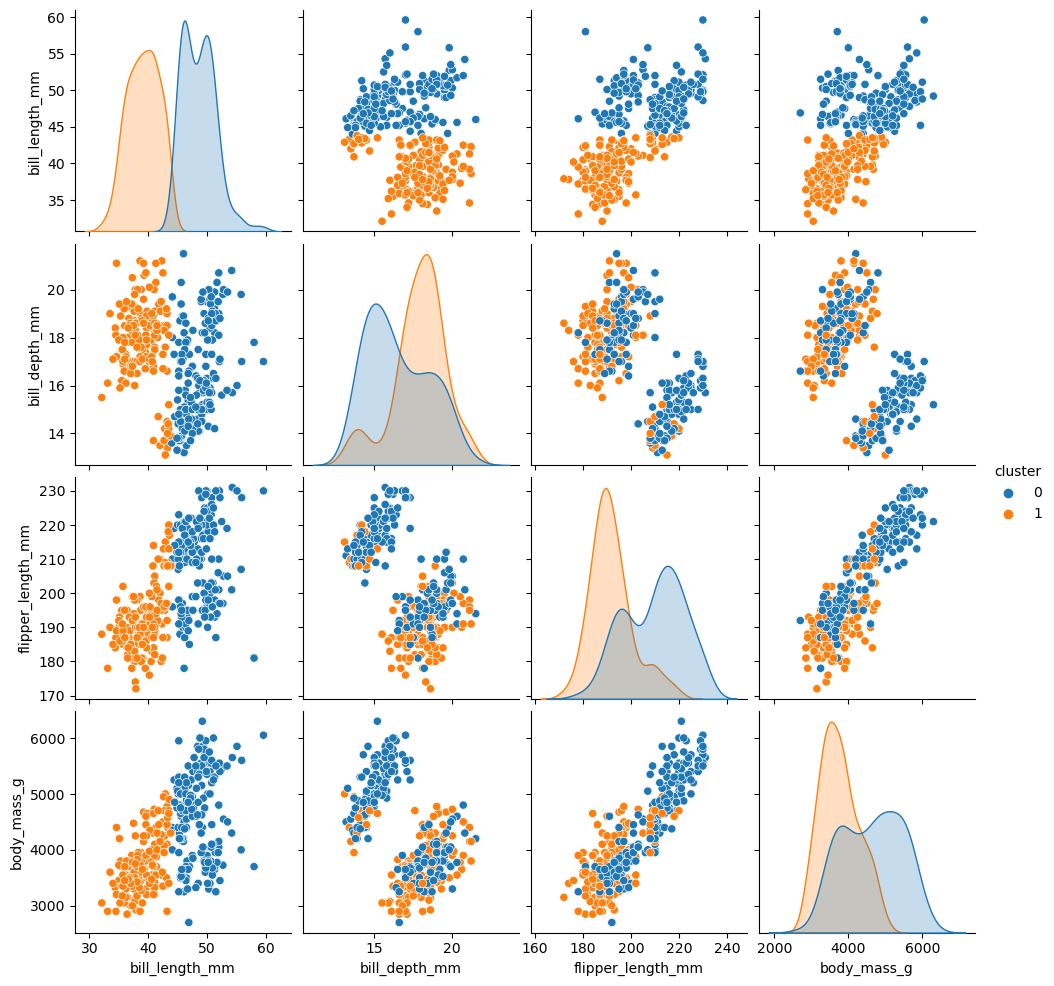

In [155]:
sns.pairplot(penguins, hue="cluster")
plt.show()

In [156]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,5,141
Chinstrap,62,6
Gentoo,104,15


There are no species which all ended up in the same cluster. This means the different species share too many similarities to be accurately clustered